In [2]:
import pandas as pd
import numpy as np

from pandas import ExcelWriter
from pandas import ExcelFile

## Ładowanie danych

In [3]:
parkinson_data_file = pd.read_excel('dane.xls')
parkinson_data_file.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


## Struktura do przechowywania danych

In [4]:
class DataSet:
    def __init__(self, data = None, target = None):
        self.data = data
        self.target = target

## Wstawienie danych do struktury

In [5]:
parkinson_data = parkinson_data_file.iloc[0:,1:-1]
parkinson_target = parkinson_data_file.iloc[0:,-1]

parkinson_data.tail(20)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
175,115.380,123.109,108.634,0.00332,0.00003,0.00160,0.00199,0.00480,0.01503,0.137,...,0.01133,0.02436,0.00401,26.005,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
176,116.388,129.038,108.970,0.00346,0.00003,0.00169,0.00213,0.00507,0.01725,0.155,...,0.01331,0.02623,0.00415,26.143,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429
177,151.737,190.204,129.859,0.00314,0.00002,0.00135,0.00162,0.00406,0.01469,0.132,...,0.01230,0.02184,0.00570,24.151,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
178,148.790,158.359,138.990,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.142,...,0.01309,0.02518,0.00488,24.412,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
179,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,...,0.01263,0.02175,0.00540,23.683,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
180,150.440,163.441,144.736,0.00396,0.00003,0.00206,0.00233,0.00619,0.02551,0.237,...,0.02148,0.03964,0.00611,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
181,148.462,161.078,141.998,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.163,...,0.01559,0.02849,0.00639,22.866,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710
182,149.818,163.417,144.786,0.00336,0.00002,0.00174,0.00198,0.00521,0.02145,0.198,...,0.01666,0.03464,0.00595,23.008,0.329577,0.757180,-6.277170,0.109397,2.209021,0.156368
183,117.226,123.925,106.656,0.00417,0.00004,0.00186,0.00270,0.00558,0.01909,0.171,...,0.01949,0.02592,0.00955,23.079,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
184,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.163,...,0.01756,0.02429,0.01179,22.085,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404


## Sprawdzenie poprawności danych w stworzonej strukturze

In [6]:
parkinson = DataSet(np.array(parkinson_data, dtype=np.double), np.array(parkinson_target, dtype=np.int8))

print(type(parkinson.data))
print(type(parkinson.target))

print(parkinson.data.shape)
print(parkinson.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(195, 22)
(195,)


## Standaryzacja danych (StandardScaler)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_parkinson = DataSet(scaler.fit_transform(parkinson.data), parkinson.target)

## Porównanie danych przed i po standaryzacji

In [8]:
print("First patient in database before scaling")
print(parkinson.data[1])
print('---Mean---')
print(parkinson.data.mean(axis=0))
print('--std---')
print(parkinson.data.std(axis=0))

First patient in database before scaling
[ 1.224000e+02  1.486500e+02  1.138190e+02  9.680000e-03  8.000000e-05
  4.650000e-03  6.960000e-03  1.394000e-02  6.134000e-02  6.260000e-01
  3.134000e-02  4.518000e-02  4.368000e-02  9.403000e-02  1.929000e-02
  1.908500e+01  4.583590e-01  8.195210e-01 -4.075192e+00  3.355900e-01
  2.486855e+00  3.686740e-01]
---Mean---
[ 1.54228641e+02  1.97104918e+02  1.16324631e+02  6.22046154e-03
  4.39589744e-05  3.30641026e-03  3.44635897e-03  9.91994872e-03
  2.97091282e-02  2.82251282e-01  1.56641538e-02  1.78782564e-02
  2.40814872e-02  4.69926154e-02  2.48470769e-02  2.18859744e+01
  4.98535538e-01  7.18099046e-01 -5.68439674e+00  2.26510349e-01
  2.38182609e+00  2.06551641e-01]
--std---
[4.12838000e+01 9.12566524e+01 4.34096764e+01 4.83568660e-03
 3.47325069e-05 2.96015496e-03 2.75189325e-03 8.88048592e-03
 1.88085186e-02 1.94376962e-01 1.01270944e-02 1.19928359e-02
 1.69032272e-02 3.03809187e-02 4.03146783e-02 4.41440157e+00
 1.03674854e-01 5.5193

In [9]:
print("First patient in database after scaling")
print(scaled_parkinson.data[1])
print('---Mean---')
print(scaled_parkinson.data.mean(axis=0))
print('--std---')
print(scaled_parkinson.data.std(axis=0))

First patient in database after scaling
[-0.77097169 -0.53097409 -0.05772056  0.71541825  1.03767418  0.45389169
  1.27680862  0.45268371  1.68173116  1.7684643   1.54791153  2.27650439
  1.15945391  1.54825419 -0.13784252 -0.63450828 -0.38752443  1.83756192
  1.47985265  1.31118546  0.27507712  1.80360503]
---Mean---
[ 2.96059473e-17 -2.27738056e-16  1.04759506e-16  1.82190445e-17
  9.10952225e-17 -1.27533312e-16  6.37666558e-17  7.28761780e-17
  2.36847579e-16 -1.63971401e-16  1.06467541e-16  2.62468110e-16
 -6.83214169e-17 -1.69380179e-16  1.09314267e-16  8.19857003e-16
 -1.09314267e-16  6.55885602e-16  1.20245694e-15 -1.13869028e-16
 -5.92118946e-16  1.36642834e-17]
--std---
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Podział danych na część trenującą i testową

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
parkinson_train = DataSet()
parkinson_test = DataSet()

In [12]:
parkinson_train.data, parkinson_test.data, \
parkinson_train.target, parkinson_test.target = \
train_test_split(scaled_parkinson.data, scaled_parkinson.target, test_size=0.1)

In [13]:
print("Training dataset:")
print("parkinson_train.data:", parkinson_train.data.shape)
print("parkinson_train.target:", parkinson_train.target.shape)

Training dataset:
parkinson_train.data: (175, 22)
parkinson_train.target: (175,)


In [14]:
print("Testing dataset:")
print("parkinson_test.data:", parkinson_test.data.shape)
print("parkinson_test.target:", parkinson_test.target.shape)

Testing dataset:
parkinson_test.data: (20, 22)
parkinson_test.target: (20,)


## Incicjacja i trenowanie modelu regresji logistycznej

In [15]:
from sklearn.linear_model import LogisticRegression

parkinson_logistic = LogisticRegression()
parkinson_logistic.fit(parkinson_train.data, parkinson_train.target)

LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

mean_errors = []
acc_scores = []
iters = []

for i in range(100, 100001, 100):
    parkinson_l = LogisticRegression(max_iter=i)
    parkinson_l.fit(parkinson_train.data, parkinson_train.target)
    acc_scores.append(accuracy_score(parkinson_test.target, parkinson_l.predict(parkinson_test.data)))
    mean_errors.append(mean_squared_error(parkinson_test.target, parkinson_l.predict(parkinson_test.data)))
    iters.append(i)

Text(0, 0.5, 'Mean squared error')

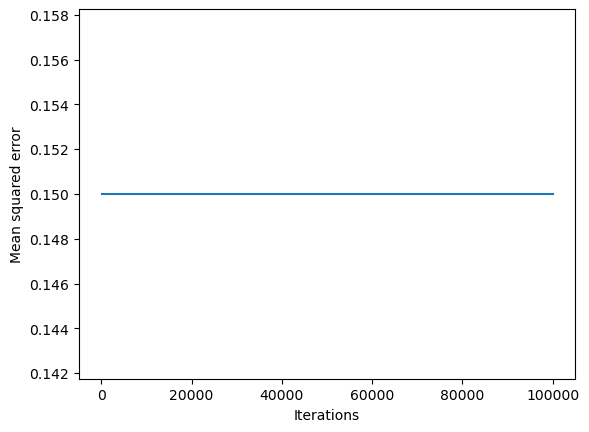

In [21]:
import matplotlib.pyplot as plt
plt.plot(iters,mean_errors)
plt.xlabel("Iterations")
plt.ylabel("Mean squared error")

Text(0, 0.5, 'Accuracy')

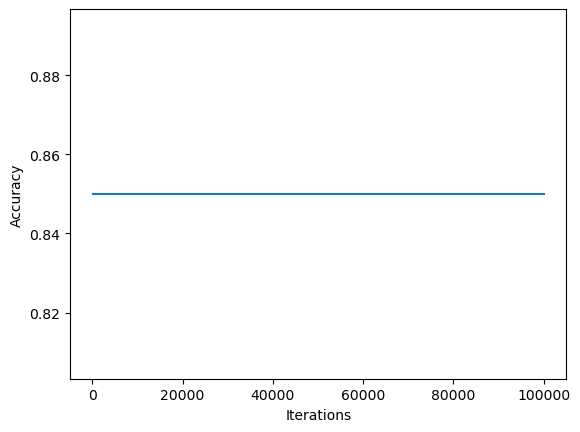

In [22]:
plt.plot(iters, acc_scores)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

## Testowanie modelu

In [463]:
id = 15
print("Model predicted for client {0} value {1}".format(id+1, parkinson_logistic.predict(parkinson_test.data[id,:].reshape(1,-1))))
print("Real value for client \"{0}\" is {1}".format(id+1, parkinson_test.target[id]))

Model predicted for client 16 value [1]
Real value for client "16" is 1


In [464]:
print("Model accuracy is {0:0.5f}".format(accuracy_score(parkinson_test.target, parkinson_logistic.predict(parkinson_test.data))))

Model accuracy is 0.85000


In [465]:
mean = mean_squared_error(parkinson_test.target, parkinson_logistic.predict(parkinson_test.data))
print("Mean squared error of a model: %.2f" % mean)

Mean squared error of a model: 0.15


In [466]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(),scaled_parkinson.data,parkinson_target, cv=5)
print(scores)

[0.92307692 0.82051282 0.84615385 0.69230769 0.76923077]


In [467]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(parkinson_test.target, parkinson_logistic.predict(parkinson_test.data)))

[[ 3  2]
 [ 1 14]]


### Sprawdzenie wpływu PolynomialFeatures na jakość modelu

In [500]:
from sklearn.preprocessing import PolynomialFeatures

pt = PolynomialFeatures(2)

In [501]:
parkinson_train_poly = pt.fit_transform(parkinson_train.data)
print(parkinson_train_poly.shape)

parkinson_test_poly = pt.fit_transform(parkinson_test.data)
print(parkinson_test_poly.shape)

(175, 276)
(20, 276)


In [502]:
logistic_poly = LogisticRegression(max_iter=10000)
logistic_poly.fit(parkinson_train_poly, parkinson_train.target)

LogisticRegression(max_iter=10000)

### Testowanie modelu regresji logistycznej z wykorzystaniem PolynomialFeatures

In [503]:
print("Accuracy with polynomial features: %.2f" % accuracy_score(parkinson_test.target, logistic_poly.predict(parkinson_test_poly)))

Accuracy with polynomial features: 0.95


In [504]:
parkinson_poly_data = pt.fit_transform(scaled_parkinson.data)

scores = cross_val_score(LogisticRegression(), parkinson_poly_data, parkinson_target, cv=4)
print(scores)

[0.89795918 0.7755102  0.85714286 0.77083333]


### Sprawdzenie jakosci modelu dla roznych stopni wielomianu w PolynomialFeatures

In [505]:
mean_errors = []
accuracy_scores = []
degrees = []

In [506]:
for i in range(2,8):
    pt = PolynomialFeatures(i)
    parkinson_train_2 = pt.fit_transform(parkinson_train.data)
    parkinson_test_2 = pt.fit_transform(parkinson_test.data)
    logistic_poly = LogisticRegression(max_iter=1000)
    logistic_poly.fit(parkinson_train_2, parkinson_train.target)
    accuracy_scores.append(accuracy_score(parkinson_test.target, logistic_poly.predict(parkinson_test_2)))
    mean_errors.append(mean_squared_error(parkinson_test.target, logistic_poly.predict(parkinson_test_2)))
    degrees.append(i)
    

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Mean squared error')

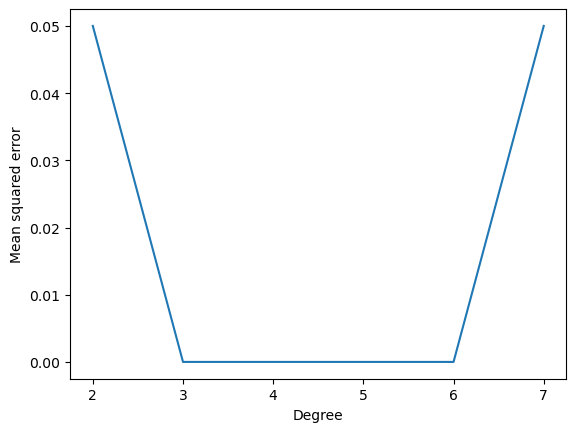

In [507]:
plt.plot(degrees,mean_errors)
plt.xlabel("Degree")
plt.ylabel("Mean squared error")

Text(0, 0.5, 'Accuracy')

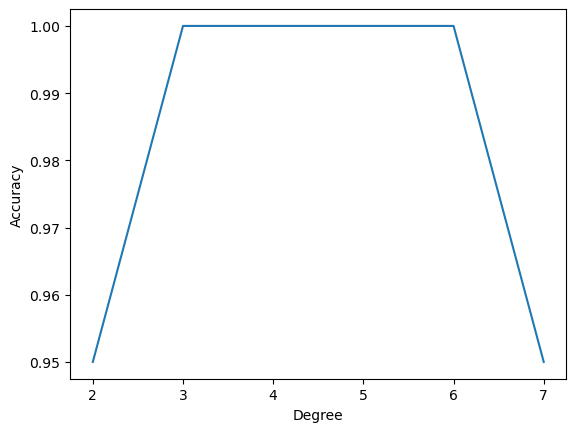

In [508]:
plt.plot(degrees, accuracy_scores)
plt.xlabel("Degree")
plt.ylabel("Accuracy")

### Sprawdzenie wpływu metody rekursywnej eliminacji cech (RFE)

In [477]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
rfe.fit(parkinson_train_poly, parkinson_train.target)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [478]:
print("Mean squared error with RFE: %.2f" % mean_squared_error(parkinson_test.target, rfe.predict(parkinson_test_poly)))

Mean squared error with RFE: 0.05


In [479]:
print("Accuracy with RFE: %.2f" % rfe.score(parkinson_test_poly, parkinson_test.target))

Accuracy with RFE: 0.95


In [494]:
mean_squared_errors = []
accuracy_scores = []
numbers = []

pt = PolynomialFeatures(3)
parkinson_train_logistic_poly = pt.fit_transform(parkinson_train.data)
parkinson_test_logistic_poly = pt.fit_transform(parkinson_test.data)

In [495]:
for i in range(10, 101, 10):
    rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=i)
    rfe.fit(parkinson_train_logistic_poly, parkinson_train.target)
    mean_squared_errors.append(mean_squared_error(parkinson_test.target, rfe.predict(parkinson_test_logistic_poly)))
    accuracy_scores.append(rfe.score(parkinson_test_logistic_poly, parkinson_test.target))
    numbers.append(i)

Text(0, 0.5, 'Mean squared errors')

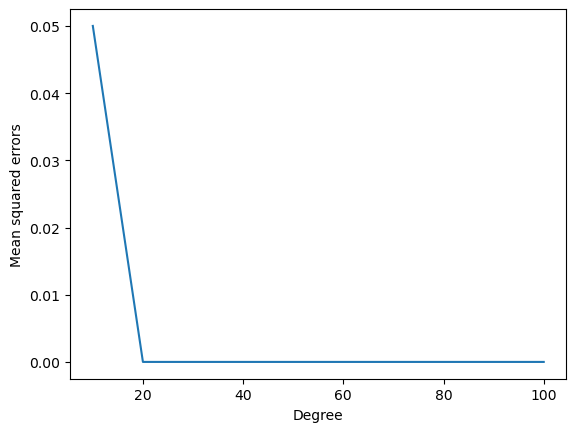

In [496]:
plt.plot(numbers,mean_squared_errors)
plt.xlabel("Degree")
plt.ylabel("Mean squared errors")

Text(0, 0.5, 'Accuracy')

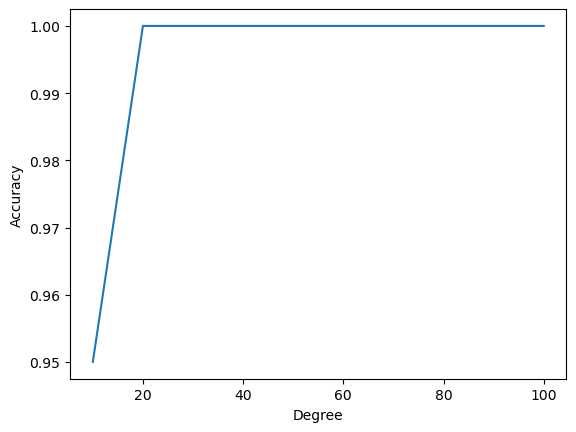

In [497]:
plt.plot(numbers,accuracy_scores)
plt.xlabel("Degree")
plt.ylabel("Accuracy")